- Para correr los codigos de imblearn hay que actualizar numpy. (Tener cuidado) correr en colab de ser posible

In [1]:
#!pip install scikit-learn pandas numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# 1. Cargar el dataset desde OpenML
#    'credit-g' => German Credit Data
X, y = fetch_openml(name='credit-g', version=1, as_frame=True, return_X_y=True)

print("Dimensiones de X:", X.shape)
print("Primeras filas:\n", X.head())
print("Clases en y:", pd.Series(y).unique())

# 2. Analizar tipos de datos (numérico vs categórico)
#    - En este dataset, ciertas columnas son object/categorical.
#    - Otras son numéricas.
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

# 3. Definir un column transformer para:
#    - OneHotEncoder en las columnas categóricas
#    - (Opcional) Escalar las columnas numéricas con StandardScaler
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough'  # Si hubiera columnas que no queremos transformar
)

# 4. Crear un pipeline que aplique las transformaciones y luego entrene un MLP
mlp_pipeline = make_pipeline(
    column_transform,
    MLPClassifier(hidden_layer_sizes=(16, 8),  # Ejemplo: 2 capas (16 y 8)
                activation='relu',
                solver='adam',
                random_state=42,
                max_iter=300)
)

# 5. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño de entrenamiento: {X_train.shape}, prueba: {X_test.shape}")

# 6. Ajustar (fit) el pipeline en entrenamiento
mlp_pipeline.fit(X_train, y_train)

# 7. Predecir y evaluar
y_pred = mlp_pipeline.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))



Dimensiones de X: (1000, 20)
Primeras filas:
   checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                       4         male single          none               

c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
cat_cols

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [3]:
num_cols

['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

In [4]:
X.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker'],
      dtype='object')

In [5]:
X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,4,real estate,31,none,own,1,unskilled resident,1,none,yes
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,4,life insurance,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,4,car,38,none,own,1,skilled,1,none,yes
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,4,no known property,23,none,for free,1,skilled,1,yes,yes


In [6]:
y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: category
Categories (2, object): ['bad', 'good']

In [7]:
X.shape

(1000, 20)

Dimensiones de X: (1000, 20)
Primeras filas:
   checking_status  duration                  credit_history  \
0              <0         6  critical/other existing credit   
1        0<=X<200        48                   existing paid   
2     no checking        12  critical/other existing credit   
3              <0        42                   existing paid   
4              <0        24              delayed previously   

               purpose  credit_amount    savings_status employment  \
0             radio/tv           1169  no known savings        >=7   
1             radio/tv           5951              <100     1<=X<4   
2            education           2096              <100     4<=X<7   
3  furniture/equipment           7882              <100     4<=X<7   
4              new car           4870              <100     1<=X<4   

   installment_commitment     personal_status other_parties  residence_since  \
0                       4         male single          none               

c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


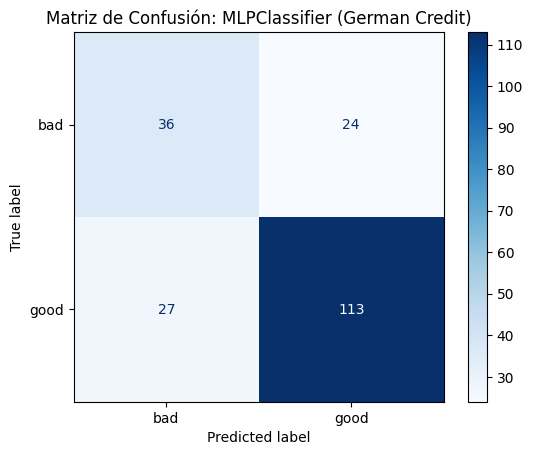

In [8]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# 1. Cargar el dataset desde OpenML
#    'credit-g' => German Credit Data
X, y = fetch_openml(name='credit-g', version=1, as_frame=True, return_X_y=True)

print("Dimensiones de X:", X.shape)
print("Primeras filas:\n", X.head())
print("Clases en y:", pd.Series(y).unique())

# 2. Analizar tipos de datos (numérico vs categórico)
#    - En este dataset, ciertas columnas son object/categorical.
#    - Otras son numéricas.
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print("Columnas categóricas:", cat_cols)
print("Columnas numéricas:", num_cols)

# 3. Definir un column transformer para:
#    - OneHotEncoder en las columnas categóricas
#    - (Opcional) Escalar las columnas numéricas con StandardScaler
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough'  # Si hubiera columnas que no queremos transformar
)

# 4. Crear un pipeline que aplique las transformaciones y luego entrene un MLP
mlp_pipeline = make_pipeline(
    column_transform,
    MLPClassifier(hidden_layer_sizes=(16, 8),  # Ejemplo: 2 capas (16 y 8)
                  activation='relu',
                  solver='adam',
                  random_state=42,
                  max_iter=300)
)

# 5. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño de entrenamiento: {X_train.shape}, prueba: {X_test.shape}")

# 6. Ajustar (fit) el pipeline en entrenamiento
mlp_pipeline.fit(X_train, y_train)

# 7. Predecir y evaluar
y_pred = mlp_pipeline.predict(X_test)

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))
# 8. Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=mlp_pipeline.steps[-1][1].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión: MLPClassifier (German Credit)")
plt.show()

In [9]:
cm

array([[ 36,  24],
       [ 27, 113]])

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def entrenar_evaluar_modelo(nombre, solver='adam', activation='relu', max_iter=300, learning_rate_init=0.001, hidden_layers=(16,8)):
    print(f"\n Entrenando modelo: {nombre}")

    # Pipeline con configuración personalizada
    pipeline = make_pipeline(
        column_transform,
        MLPClassifier(hidden_layer_sizes=hidden_layers,
                    activation=activation,
                    solver=solver,
                    max_iter=max_iter,
                    learning_rate_init=learning_rate_init,
                    random_state=42)
    )

    # Entrenar
    pipeline.fit(X_train, y_train)

    # Predecir
    y_pred = pipeline.predict(X_test)

    # Reporte de clasificación
    print(f"\n Reporte de clasificación - {nombre}")
    print(classification_report(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=pipeline.steps[-1][1].classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusión: {nombre}")
    plt.show()


### Variacion 1


 Entrenando modelo: Variacion_1 MLP_3Capas

 Reporte de clasificación - Variacion_1 MLP_3Capas
              precision    recall  f1-score   support

         bad       0.49      0.60      0.54        60
        good       0.81      0.74      0.77       140

    accuracy                           0.69       200
   macro avg       0.65      0.67      0.66       200
weighted avg       0.72      0.69      0.70       200



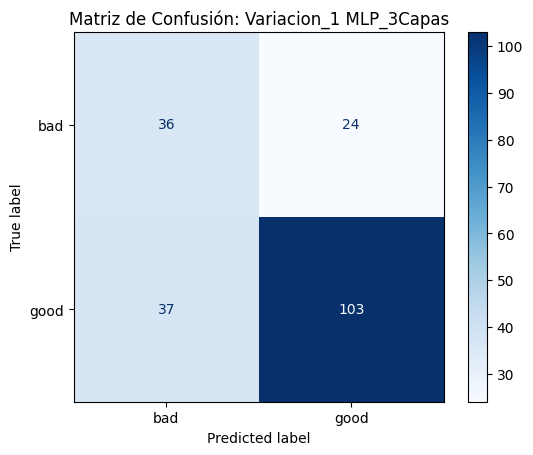

In [11]:
entrenar_evaluar_modelo("Variacion_1 MLP_3Capas", hidden_layers=(32, 16, 8))

### Variacion 2


 Entrenando modelo: MLP_Tanh

 Reporte de clasificación - MLP_Tanh
              precision    recall  f1-score   support

         bad       0.52      0.52      0.52        60
        good       0.79      0.79      0.79       140

    accuracy                           0.71       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.71      0.71      0.71       200



c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


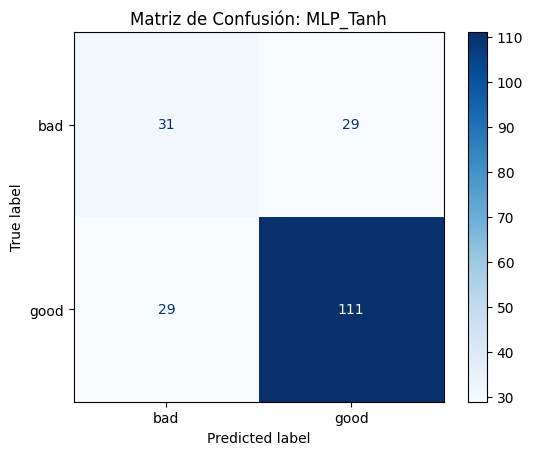

In [12]:
entrenar_evaluar_modelo("MLP_Tanh", activation='tanh')

### Variacion 3


 Entrenando modelo: MLP_SGD

 Reporte de clasificación - MLP_SGD
              precision    recall  f1-score   support

         bad       0.51      0.48      0.50        60
        good       0.78      0.80      0.79       140

    accuracy                           0.70       200
   macro avg       0.65      0.64      0.64       200
weighted avg       0.70      0.70      0.70       200



c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


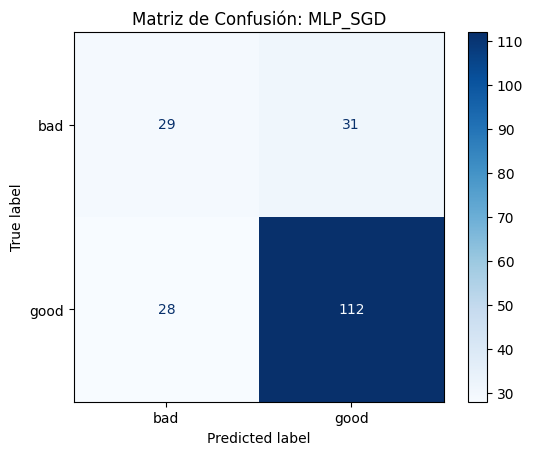

In [13]:
entrenar_evaluar_modelo("MLP_SGD", solver='sgd', max_iter=500, learning_rate_init=0.001)

### Variacion 4


 Entrenando modelo: MLP_Iter500

 Reporte de clasificación - MLP_Iter500
              precision    recall  f1-score   support

         bad       0.54      0.55      0.55        60
        good       0.81      0.80      0.80       140

    accuracy                           0.72       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.73      0.72      0.73       200



c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


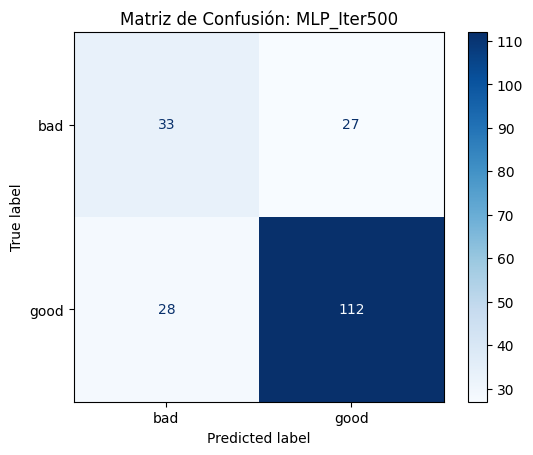

In [14]:
entrenar_evaluar_modelo("MLP_Iter500", max_iter=500)

### Variacion 5


 Entrenando modelo: MLP_LR_Bajo

 Reporte de clasificación - MLP_LR_Bajo
              precision    recall  f1-score   support

         bad       0.64      0.27      0.38        60
        good       0.75      0.94      0.83       140

    accuracy                           0.73       200
   macro avg       0.69      0.60      0.60       200
weighted avg       0.72      0.73      0.70       200



c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


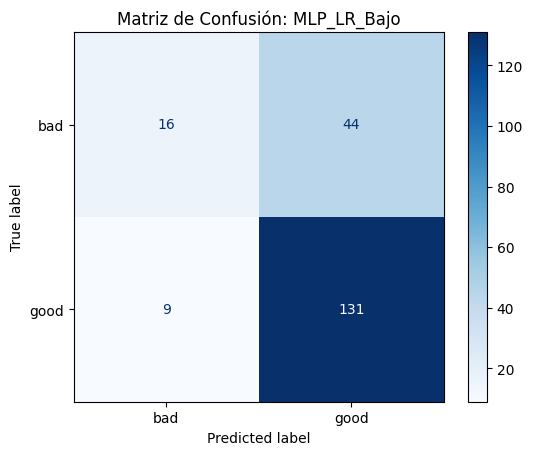

In [15]:
entrenar_evaluar_modelo("MLP_LR_Bajo", learning_rate_init=0.0001)

### Variacion 6


 Entrenando modelo: MLP_LR_Alto

 Reporte de clasificación - MLP_LR_Alto
              precision    recall  f1-score   support

         bad       0.49      0.60      0.54        60
        good       0.81      0.74      0.77       140

    accuracy                           0.69       200
   macro avg       0.65      0.67      0.66       200
weighted avg       0.72      0.69      0.70       200



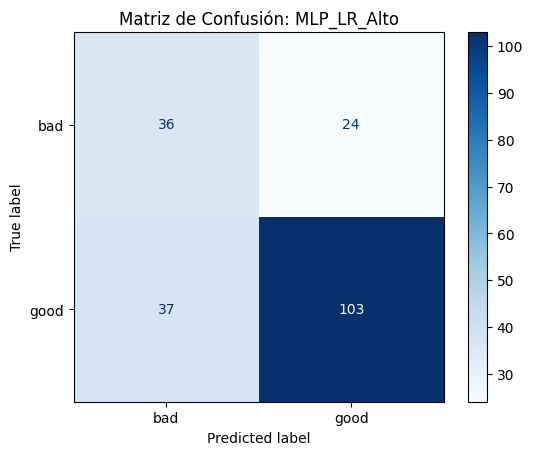

In [16]:
entrenar_evaluar_modelo("MLP_LR_Alto", learning_rate_init=0.01)

### Variacion 7


 Entrenando modelo: MLP_Sigmoid

 Reporte de clasificación - MLP_Sigmoid
              precision    recall  f1-score   support

         bad       0.49      0.55      0.52        60
        good       0.80      0.75      0.77       140

    accuracy                           0.69       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.70      0.69      0.70       200



c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


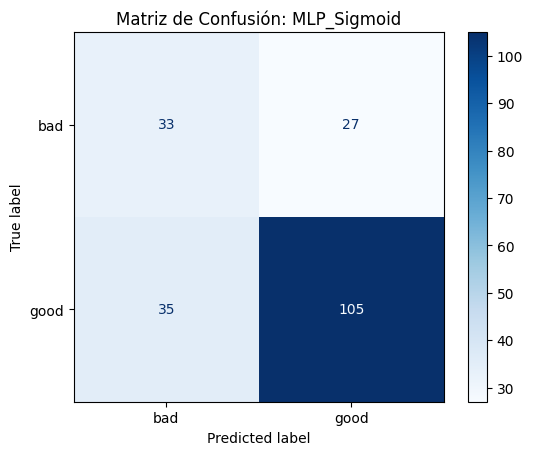

In [17]:
entrenar_evaluar_modelo('MLP_Sigmoid',max_iter=1000, solver='adam', activation='logistic', hidden_layers=(16, 8, 4), learning_rate_init=0.001)

In [18]:
y.value_counts()

class
good    700
bad     300
Name: count, dtype: int64

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Mejores hiperparámetros: {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (16, 8), 'mlpclassifier__learning_rate_init': 0.001, 'mlpclassifier__solver': 'adam'}

Reporte de clasificación:
              precision    recall  f1-score   support

         bad       0.52      0.52      0.52        60
        good       0.79      0.79      0.79       140

    accuracy                           0.71       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.71      0.71      0.71       200



c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


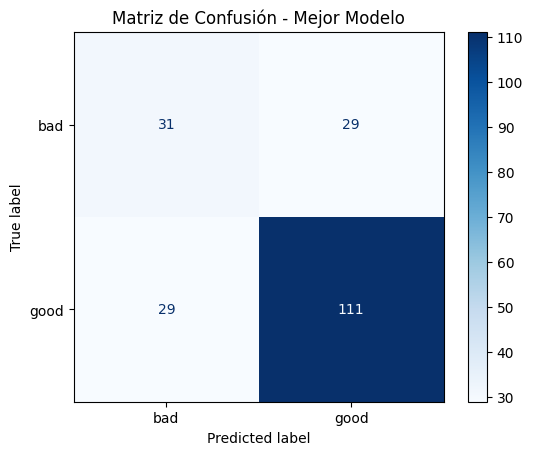

In [19]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# 1. Cargar dataset
X, y = fetch_openml(name='credit-g', version=1, as_frame=True, return_X_y=True)

# 2. Identificar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=[float, int]).columns.tolist()

# 3. Transformaciones
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols)
)

# 4. Crear el pipeline
pipeline = make_pipeline(
    column_transform,
    MLPClassifier(max_iter=300, random_state=42)
)

# 5. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. Definir grid de hiperparámetros
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(16, 8), (32, 16, 8), (32, 16, 8)],
    'mlpclassifier__activation': ['relu', 'tanh'],
    'mlpclassifier__solver': ['adam', 'sgd'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],  # Regularización L2
    'mlpclassifier__learning_rate_init': [0.001, 0.01],
    
}

# 7. Aplicar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 8. Resultados
print("Mejores hiperparámetros:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# 9. Matriz de confusión
cm_display = ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Mejor Modelo")
plt.show()


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [21]:
# Balanceo de clases
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

### Oversampling (SMOTE)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

🔹 Resultados OVERSAMPLING (SMOTE)
Mejores parámetros: {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (16, 8), 'mlpclassifier__learning_rate_init': 0.001}
Mejor F1 macro: 0.6448618589338726

Reporte de clasificación:
               precision    recall  f1-score   support

         bad       0.58      0.48      0.53        60
        good       0.79      0.85      0.82       140

    accuracy                           0.74       200
   macro avg       0.69      0.67      0.67       200
weighted avg       0.73      0.74      0.73       200



c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


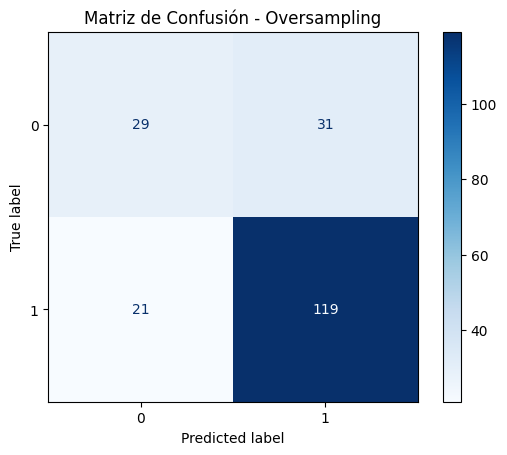

In [22]:
# 1. Cargar datos
X, y = fetch_openml(name='credit-g', version=1, as_frame=True, return_X_y=True)

# 2. Columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 3. Transformaciones
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough'
)

# 4. División
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Pipeline con SMOTE
oversample_pipeline = ImbPipeline(steps=[
    ('preprocessing', column_transform),
    ('smote', SMOTE(random_state=42)),
    ('mlpclassifier', MLPClassifier(max_iter=500, random_state=42))
])

# 6. Grid de parámetros
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(16, 8)],
    'mlpclassifier__activation': ['relu', 'tanh'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
    'mlpclassifier__learning_rate_init': [0.001, 0.01]
}

# 7. Entrenar
grid_over = GridSearchCV(oversample_pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_over.fit(X_train, y_train)

# 8. Resultados
print("\n🔹 Resultados OVERSAMPLING (SMOTE)")
print("Mejores parámetros:", grid_over.best_params_)
print("Mejor F1 macro:", grid_over.best_score_)

y_pred = grid_over.predict(X_test)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# 9. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Oversampling")
plt.show()

### UNDERSAMPLING (RandomUnderSampler)

Fitting 5 folds for each of 24 candidates, totalling 120 fits

🔹 Resultados con UNDERSAMPLING (RandomUnderSampler)
Mejores parámetros: {'mlpclassifier__activation': 'tanh', 'mlpclassifier__alpha': 0.01, 'mlpclassifier__hidden_layer_sizes': (16, 8), 'mlpclassifier__learning_rate_init': 0.001}
F1-score (macro) validación: 0.6654250932052228

Reporte de clasificación:
               precision    recall  f1-score   support

         bad       0.49      0.67      0.56        60
        good       0.83      0.70      0.76       140

    accuracy                           0.69       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.73      0.69      0.70       200



c:\Users\aluca\miniconda3\envs\ML_2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


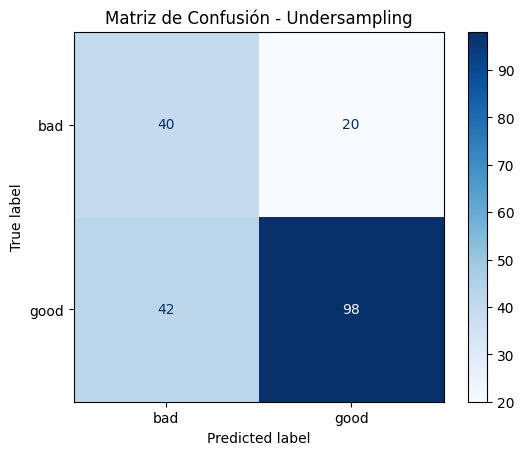

In [23]:
# 1. Cargar el dataset desde OpenML
X, y = fetch_openml(name='credit-g', version=1, as_frame=True, return_X_y=True)

# 2. Identificar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
num_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# 3. Preprocesamiento: OneHotEncoder para categóricas, StandardScaler para numéricas
column_transform = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), cat_cols),
    (StandardScaler(), num_cols),
    remainder='passthrough'
)

# 4. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Definir pipeline con RandomUnderSampler
undersample_pipeline = ImbPipeline(steps=[
    ('preprocessing', column_transform),
    ('under', RandomUnderSampler(random_state=42)),
    ('mlpclassifier', MLPClassifier(max_iter=500, random_state=42))
])

# 6. Grid de hiperparámetros
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(16, 8), (32, 16, 8)],
    'mlpclassifier__activation': ['relu', 'tanh'],
    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],  # Regularización
    'mlpclassifier__learning_rate_init': [0.001, 0.01]
}

# 7. Entrenar con GridSearchCV
grid_under = GridSearchCV(
    undersample_pipeline,
    param_grid,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_under.fit(X_train, y_train)

# 8. Evaluación en test
print("\n🔹 Resultados con UNDERSAMPLING (RandomUnderSampler)")
print("Mejores parámetros:", grid_under.best_params_)
print("F1-score (macro) validación:", grid_under.best_score_)

y_pred_under = grid_under.predict(X_test)

print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_under))

# 9. Matriz de confusión
cm_under = confusion_matrix(y_test, y_pred_under)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_under, display_labels=grid_under.best_estimator_['mlpclassifier'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - Undersampling")
plt.show()